# Pre-election preferences

In this script I attempt to figure out the preferences of different age, gender, and racial groups.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

## Beliefs

For this analysis, data from the Imperial College London that was provided on GitHub was used. See the data [here](https://github.com/YouGov-Data/covid-19-tracker).

In [14]:
df = pd.read_csv('../data_raw/covid-19-tracker-master/data/united-states.csv')
df = df[['endtime','state','age','gender','ox5_2','w1','w3']]
df.columns = ['date','state','age','gender','trust_gov','country_division','belonging']
#df

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (81,90) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m/%d/%Y')
df

,date,state,age,gender,trust_gov,country_division,belonging
0,02/04/2020,California,33,Female,,,
1,02/04/2020,Pennsylvania,38,Male,,,
2,02/04/2020,Florida,48,Female,,,
3,02/04/2020,California,31,Male,,,
4,02/04/2020,Florida,69,Female,,,
...,...,...,...,...,...,...,...
16977,09/29/2020,Oklahoma,27,Female,,More divided,No change
16978,09/29/2020,California,74,Female,,More divided,No change
16979,09/29/2020,Rhode Island,26,Female,,No change,No change
16980,09/30/2020,Mississippi,22,Male,,More united,No change


In [16]:
df = df.replace({'belonging' : { 'No change' : 2, 'Decreased' : 1, 'Increased' : 3, ' ': np.nan }})
df = df.replace({'country_division' : { 'No change' : 2, 'More united' : 1, 'More divided' : 3, ' ': np.nan }})
df = df.replace({'trust_gov' : { ' ' : np.nan, '1 - Not at all trustworthy' : 1, '2' : 2, '3': 3, '4': 4, '5 - Completely trustworthy': 5 }})

In [17]:
df = df.replace({'gender' : { 'Female' : 0, 'Male' : 1}})
df.rename(columns = {'gender': 'male'}, inplace=True)
# creating a dummy variable for the battleground states
df['battleground_state'] = 0
df['democratic_state'] = 0
# list of the battleground states and one of the democratic states
a = ['Arizona','Texas','Florida','Georgia','North Carolina','Pennsylvania','Michigan','Wisconsin','Minnesota','New Hampshire','Maine']
b = ['California','Nevada','Oregon','Washington','Colorado','New Mexico','Iowa','Illinois','New York','Vermont','Massachussets','Connecticut','Rhode Island','New Jersey','Delaware','District of Columbia','Virginia','Maryland']
for i in range(len(df)):
    if df['state'][i] in a:
        df['battleground_state'][i] = 1
    elif df['state'][i] in b:
        df['democratic_state'][i] = 1
    else:
        continue

<ipython-input-17-bf86b6056090>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['democratic_state'][i] = 1
<ipython-input-17-bf86b6056090>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['battleground_state'][i] = 1


In [19]:
df.to_csv('../data_clean/covid_tracker.csv')
df

,date,state,age,male,trust_gov,country_division,belonging,battleground_state,democratic_state
0,02/04/2020,California,33,0,NaN,NaN,NaN,0,1
1,02/04/2020,Pennsylvania,38,1,NaN,NaN,NaN,1,0
2,02/04/2020,Florida,48,0,NaN,NaN,NaN,1,0
3,02/04/2020,California,31,1,NaN,NaN,NaN,0,1
4,02/04/2020,Florida,69,0,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...
16977,09/29/2020,Oklahoma,27,0,NaN,3.0,2.0,0,0
16978,09/29/2020,California,74,0,NaN,3.0,2.0,0,1
16979,09/29/2020,Rhode Island,26,0,NaN,2.0,2.0,0,1
16980,09/30/2020,Mississippi,22,1,NaN,1.0,2.0,0,0


In [20]:
print(df['trust_gov'].count())
df['trust_gov'].value_counts()

985


1.0    304
3.0    287
2.0    212
4.0    140
5.0     42
Name: trust_gov, dtype: int64

In [21]:
print(df['belonging'].count())
df['belonging'].value_counts()

966


2.0    628
1.0    216
3.0    122
Name: belonging, dtype: int64

In [22]:
print(df['country_division'].count())
df['country_division'].value_counts()

966


3.0    690
2.0    185
1.0     91
Name: country_division, dtype: int64

## Pew Research Center - Presidential Preference (October 2020)

The data was retrieved from [Pew Research Center](https://www.pewresearch.org/politics/2020/10/09/amid-campaign-turmoil-biden-holds-wide-leads-on-coronavirus-unifying-the-country/).

In [5]:
df = pd.read_csv('../data_raw/pre_el_preferences_by_characteristics.csv',skiprows=5,index_col=0)
df = df.drop(['Unnamed: 4','Unnamed: 6','Unnamed: 7'],axis=1)
df.columns = ['trump','biden','margin','mar_err']
df = df.dropna()
df.to_csv('../data_clean/preferences.csv')
df

,trump,biden,margin,mar_err
All registered voters,42.0,52.0,Biden +10,1.5
Men,45.0,49.0,Biden +4,2.4
Women,39.0,55.0,Biden +16,1.8
White,51.0,44.0,Trump +7,1.6
Black,8.0,89.0,Biden +81,5.1
...,...,...,...,...
Donald Trump,92.0,6.0,Trump +86,2.6
Hillary Clinton,4.0,95.0,Biden +91,2.3
Someone else,26.0,49.0,Biden +23,4.9
Republican House candidate,89.0,6.0,Trump +83,2.6


Although the data frame is great to look at, in order to work with it we shall now transpose it.

## Population Model

The data on the percentage of each ethnicities in each state and the median household income by state comes from worldpoopulaitonreview.com ([ethnicity by state](https://worldpopulationreview.com/states/states-by-race) | [median income](https://worldpopulationreview.com/state-rankings/median-household-income-by-state)). The urbanization index comes from [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/urbanization-index). The voting data comes from another of my scripts, `do_approval.ipynb`.

In [61]:
# load data w/ dem voter by state
df = pd.read_csv('../data_clean/ele_results_state.csv',index_col=0)
# load ethnicity data
a = pd.read_csv('../data_raw/states_by_ethnicity.csv') # careful, also includes Puerto Rico
# load median household income data by state
b = pd.read_csv('../data_raw/state_median_income.csv')
# load the urbanization index by state
c = pd.read_csv('../data_raw/urbanization-state.csv')

In [63]:
a.columns = ['state','white','black','native','asian','islander','other_race','two_race']
b.columns = ['state','median_hh_income']

df = pd.merge(df, a, how='left', on=['state'])
df = pd.merge(df, b, how='left', on=['state'])
df = pd.merge(df, c, how='left', on=['state'])

In [64]:
df.to_csv('../data_clean/voter_preferenes.csv')

### Regression analysis

In [65]:
import math

In [66]:
df.rename(columns = {'2020per_dem':'per_dem'}, inplace = True)
df['log_per_dem'] = np.nan
df['log_white'] = np.nan
df['log_black'] = np.nan
df['log_asian'] = np.nan
df['log_islander'] = np.nan
df['log_native'] = np.nan
df['log_hh_income'] = np.nan

for i in range(len(df)):
    df['log_per_dem'][i] = math.log(df['per_dem'][i])
    df['log_white'][i] = math.log(df['white'][i])
    df['log_black'][i] = math.log(df['black'][i])
    df['log_asian'][i] = math.log(df['asian'][i])
    df['log_islander'][i] = math.log(df['islander'][i])
    df['log_native'][i] = math.log(df['native'][i])
    df['log_hh_income'][i] = math.log(df['median_hh_income'][i])

<ipython-input-66-819e6ea93967>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_per_dem'][i] = math.log(df['per_dem'][i])
<ipython-input-66-819e6ea93967>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_white'][i] = math.log(df['white'][i])
<ipython-input-66-819e6ea93967>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_black'][i] = math.log(df['black'][i])
<ipython-input-66-819e6ea93967>:14: SettingWithCopy

We see that the coefficients aren't very significant. We do the same thing again, this time leaving out the percentage of white people in the population.

Another regression leaving out the variable `log_white` gives us coefficients that are clearly more significant.

# ANES Data

Data comes from the American National Election Studies and can be found [here](https://electionstudies.org/data-center/2020-time-series-study/).

In [2]:
data = pd.read_stata('../data_raw/anes_timeseries/anes_timeseries.dta')
data.to_csv('../data_clean/anes_data.csv')

## How people like the candidates

In [3]:
data['V202435'].value_counts()

0. Strongly dislike                                               1484
10. Strongly like                                                 1066
8.0                                                                953
-6. No post-election interview                                     750
7.0                                                                701
9.0                                                                678
5.0                                                                543
6.0                                                                415
2.0                                                                399
1.0                                                                396
3.0                                                                381
4.0                                                                334
-7. No post-election data, deleted due to incomplete interview      77
-5. Interview breakoff (sufficient partial IW)                      73
-9. Re

In [5]:
data['like_trump'] = np.nan
data['like_biden'] = np.nan

# trump variable
for i in range(len(data)):
    if data['V202436'][i] == '0. Strongly dislike':
        data['like_trump'][i] = 0
    elif data['V202436'][i] == '10. Strongly like':
        data['like_trump'][i] = 10
    elif type(data['V202436'][i]) == str:
        data['like_trump'][i] = np.nan
    else:
        data['like_trump'][i] = int(data['V202436'][i])

# biden variable
for i in range(len(data)):
    if data['V202435'][i] == '0. Strongly dislike':
        data['like_biden'][i] = 0
    elif data['V202435'][i] == '10. Strongly like':
        data['like_biden'][i] = 10
    elif type(data['V202435'][i]) == str:
        data['like_biden'][i] = np.nan
    else:
        data['like_biden'][i] = int(data['V202435'][i])

data['like_biden'].value_counts()

<ipython-input-5-e563f26685e7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['like_trump'][i] = int(data['V202436'][i])
<ipython-input-5-e563f26685e7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['like_trump'][i] = 0
<ipython-input-5-e563f26685e7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['like_trump'][i] = 10
<ipython-input-5-e563f26685e7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy

0.0     1484
10.0    1066
8.0      953
7.0      701
9.0      678
5.0      543
6.0      415
2.0      399
1.0      396
3.0      381
4.0      334
Name: like_biden, dtype: int64

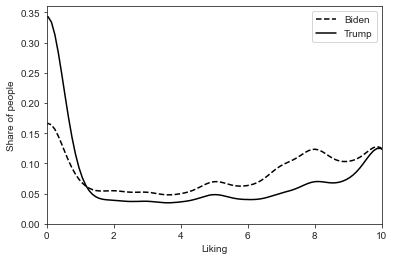

In [9]:
import seaborn as sns
import matplotlib.patches as  mpatches

sns.set_style('ticks')
sns.kdeplot(np.array(data['like_biden']), bw=0.5, color='black', linestyle='--',label='Biden')
sns.kdeplot(np.array(data['like_trump']), bw=0.5, color='black',label='Trump')
plt.xlim(0,10)
plt.legend()
plt.ylabel('Share of people')
plt.xlabel('Liking')

#handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Trump"),
           #mpatches.Patch(facecolor=plt.cm.Blues(100), label="Biden")]
#plt.legend(handles=handles)

plt.savefig('../data_clean/liking_candidates.pdf',bbox_inches='tight')

plt.show()

## Voting based on characteristics

For this we use the same data as in VBM (Chapter 3.3). To see how the data was cleaned, see `3.3_voting_by_mail.ipynb`. The raw data is from [American National Election Studies](https://electionstudies.org/data-center/2020-time-series-study/).

In [4]:
df = pd.read_csv('../data_clean/vbm.csv')
df

,Unnamed: 0,id,vote,sex,sex_orientation,vbm,income,education,white,black,...,city,dist_0-15,dist_16-30,dist_31-59,dist_60-120,dist_120+,rel_chr,rel_jew,rel_mus,rel_ath
0,0,200015.0,NaN,1.0,0.0,NaN,175000.0,17.0,0.0,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,200022.0,NaN,0.0,0.0,NaN,70000.0,15.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2,200039.0,1.0,0.0,0.0,NaN,100000.0,13.0,1.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,200046.0,1.0,1.0,0.0,NaN,35000.0,15.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
4,4,200053.0,0.0,1.0,0.0,NaN,250000.0,22.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,8275,535315.0,NaN,0.0,0.0,NaN,40000.0,15.0,1.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8276,8276,535360.0,0.0,0.0,0.0,NaN,125000.0,17.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
8277,8277,535414.0,1.0,1.0,0.0,NaN,90000.0,13.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
8278,8278,535421.0,NaN,0.0,0.0,0.0,75000.0,15.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
# 1 = Biden
# 0 = Trump
df['vote'].value_counts()

1.0    3270
0.0    2463
Name: vote, dtype: int64

To see how different voter characteristics may be used to predict how individuals voted, we use a linear probability model for our regression analysis. The actual regression is run in R, see file `voting_patterns.R`.

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'vote', 'sex', 'sex_orientation', 'vbm', 'income',
       'education', 'white', 'black', 'hisp', 'asian', 'native', 'rural',
       'town', 'suburb', 'city', 'dist_0-15', 'dist_16-30', 'dist_31-59',
       'dist_60-120', 'dist_120+', 'rel_chr', 'rel_jew', 'rel_mus', 'rel_ath'],
      dtype='object')

In [13]:
df[['vote','sex','sex_orientation','education','white','black','asian','hisp','native','rural','town','suburb','city','rel_chr','rel_jew','rel_mus','rel_ath']].describe()

,vote,sex,sex_orientation,education,white,black,asian,hisp,native,rural,town,suburb,city,rel_chr,rel_jew,rel_mus,rel_ath
count,5733.000000,8213.000000,8135.000000,8149.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7387.000000,7387.000000,7387.000000,7387.000000,4939.000000,4939.000000,4939.000000,4939.000000
mean,0.570382,0.458176,0.064659,15.685483,0.754142,0.091817,0.035918,0.096370,0.021753,0.150941,0.249492,0.302829,0.296738,0.791051,0.038064,0.009719,0.161166
std,0.495065,0.498278,0.245938,2.571484,0.430622,0.288786,0.186096,0.295117,0.145885,0.358015,0.432749,0.459513,0.456851,0.406599,0.191371,0.098113,0.367721
min,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
